In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
def astar(graph, start, goal):
    """
    Encontra o caminho mais curto em um grafo ponderado usando o algoritmo A*.

    Args:
        graph (networkx.Graph): Grafo ponderado.
        start (int): Nó de partida.
        goal (int): Nó de destino.

    Returns:
        list: Lista de nós que representa o caminho mais curto do nó de partida até o nó de destino.
        None: Caso não exista caminho entre o nó de partida e o nó de destino.

    """

    open_set = {start}
    # This code computes the path from the start to the goal.
    # The came_from dictionary maps a node to the node immediately preceding it on the path.
    came_from = {}

    g_score = {node: float('inf') for node in graph.nodes}
    g_score[start] = 0

    f_score = {node: float('inf') for node in graph.nodes}
    f_score[start] = heuristic_cost_estimate(start, goal)

    while open_set:
        current = min(open_set, key=lambda node: f_score[node])

        if current == goal:
            return reconstruct_path(came_from, current)

        open_set.remove(current)

        for neighbor in graph.neighbors(current):
            tentative_g_score = g_score[current] + graph[current][neighbor]['weight']

            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic_cost_estimate(neighbor, goal)

                if neighbor not in open_set:
                    open_set.add(neighbor)

    return None  # Caminho não encontrado então retorna None

def heuristic_cost_estimate(node, goal):
    # Distância euclidiana simples como heurística para simplicidade
    x1, y1 = graph.nodes[node]['pos']
    x2, y2 = graph.nodes[goal]['pos']
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.insert(0, current)
    return total_path

def visualize_path(graph, path):
    """
    Desenha um grafo e destaca um caminho específico.

    :param graph: O grafo a ser desenhado.
    :type graph: networkx.Graph
    :param path: O caminho a ser destacado.
    :type path: list
    """
    pos = nx.get_node_attributes(graph, 'pos')
    nx.draw(graph, pos, with_labels=True, node_size=700, font_size=8, font_color='white')
    nx.draw_networkx_nodes(graph, pos, nodelist=path, node_color='red', node_size=700)
    nx.draw_networkx_edges(graph, pos, edgelist=list(zip(path[:-1], path[1:])), edge_color='red', width=2)
    plt.show()

Caminho encontrado: ['E', 'A']


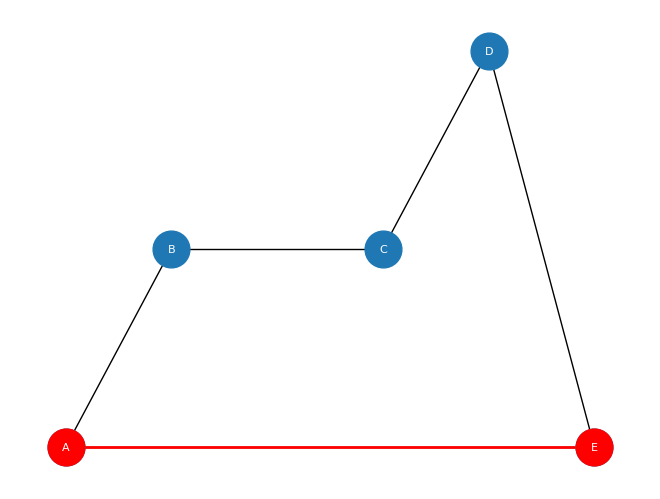

In [4]:
# Criando um grafo simples para representar o mapa
graph = nx.Graph()
graph.add_node('A', pos=(0, 0))
graph.add_node('B', pos=(1, 1))
graph.add_node('C', pos=(3, 1))
graph.add_node('D', pos=(4, 2))
graph.add_node('E', pos=(5, 0))

graph.add_edge('A', 'B', weight=1)
graph.add_edge('B', 'C', weight=2)
graph.add_edge('C', 'D', weight=3)
graph.add_edge('D', 'E', weight=2)
graph.add_edge('E', 'A', weight=2)

# Executando o algoritmo A*
no_inicial = 'E'
no_destino = 'A'
path = astar(graph, no_inicial, no_destino)

# Visualizando o resultado
if path:
    print(f"Caminho encontrado: {path}")
    visualize_path(graph, path)
else:
    print("Nenhum caminho encontrado.")